2005-12-04 04:47:00 : 2
2005-12-04 04:51:00 : 15
2005-12-04 04:52:00 : 17
2005-12-04 04:53:00 : 12
2005-12-04 04:54:00 : 15
2005-12-04 04:56:00 : 5
2005-12-04 04:57:00 : 8
2005-12-04 04:58:00 : 5
2005-12-04 04:59:00 : 6
2005-12-04 05:00:00 : 9
2005-12-04 05:01:00 : 2
2005-12-04 05:02:00 : 2
2005-12-04 05:04:00 : 21
2005-12-04 05:11:00 : 1
2005-12-04 05:12:00 : 11
2005-12-04 05:15:00 : 4
2005-12-04 06:01:00 : 8
2005-12-04 06:02:00 : 14
2005-12-04 06:06:00 : 19
2005-12-04 06:11:00 : 2
2005-12-04 06:12:00 : 17
2005-12-04 06:13:00 : 2
2005-12-04 06:16:00 : 14
2005-12-04 06:17:00 : 16
2005-12-04 06:18:00 : 14
2005-12-04 06:19:00 : 13
2005-12-04 06:20:00 : 11
2005-12-04 06:22:00 : 16
2005-12-04 06:23:00 : 3
2005-12-04 06:30:00 : 3
2005-12-04 06:36:00 : 6
2005-12-04 06:40:00 : 3
2005-12-04 06:41:00 : 12
2005-12-04 06:42:00 : 12
2005-12-04 06:43:00 : 9
2005-12-04 06:44:00 : 5
2005-12-04 06:45:00 : 8
2005-12-04 06:46:00 : 17
2005-12-04 06:47:00 : 8
2005-12-04 06:48:00 : 5
2005-12-04 06:49:00 : 

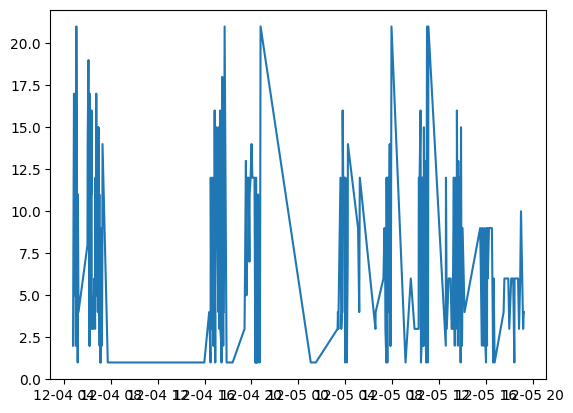

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

"""
    What are the possible ways in which I can plot Events logged with time?
    1. Events logged plotted second wise, or hour wise, are too small and too large to make any analysis, respectively.
       I think Events logged per minute would be the best idea.
    
    2. Maybe I can try doing this: Strip the seconds away. From hour and minutes, count the number of instances of each in
       the given csv file, and then try plotting using that.
    
    3. To do this, I'll create dict of datetime objects, with key as the datetime object and value as the number of its
       instances.
"""

datetime_dict = {}

with open('output.csv', 'r') as file:
    for line in file:
        if line.split(',')[0] == 'LineId':
            continue
        full_datetime = line.split(',')[1]
        datetime_obj = datetime.strptime(full_datetime, "%a %b %d %H:%M:%S %Y")
        datetime_obj = datetime_obj.replace(second=0)
        if datetime_obj not in datetime_dict:
            datetime_dict[datetime_obj] = 1
        else:
            datetime_dict[datetime_obj] += 1
    
    #Sort the dict by increasing time.
    datetime_dict = dict(sorted(datetime_dict.items(), key= lambda item: item[0]))
    for element in datetime_dict:
        print(f"{element} : {datetime_dict[element]}")
    
    #Plotting.
    x_objs = [element for element in datetime_dict]
    y_objs = [datetime_dict[element] for element in datetime_dict]
    plt.plot(x_objs, y_objs)
    plt.show()
        